<a href="https://colab.research.google.com/github/SiddheshDaphane/Deep_Learning_With_PyTorch/blob/master/03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision
****

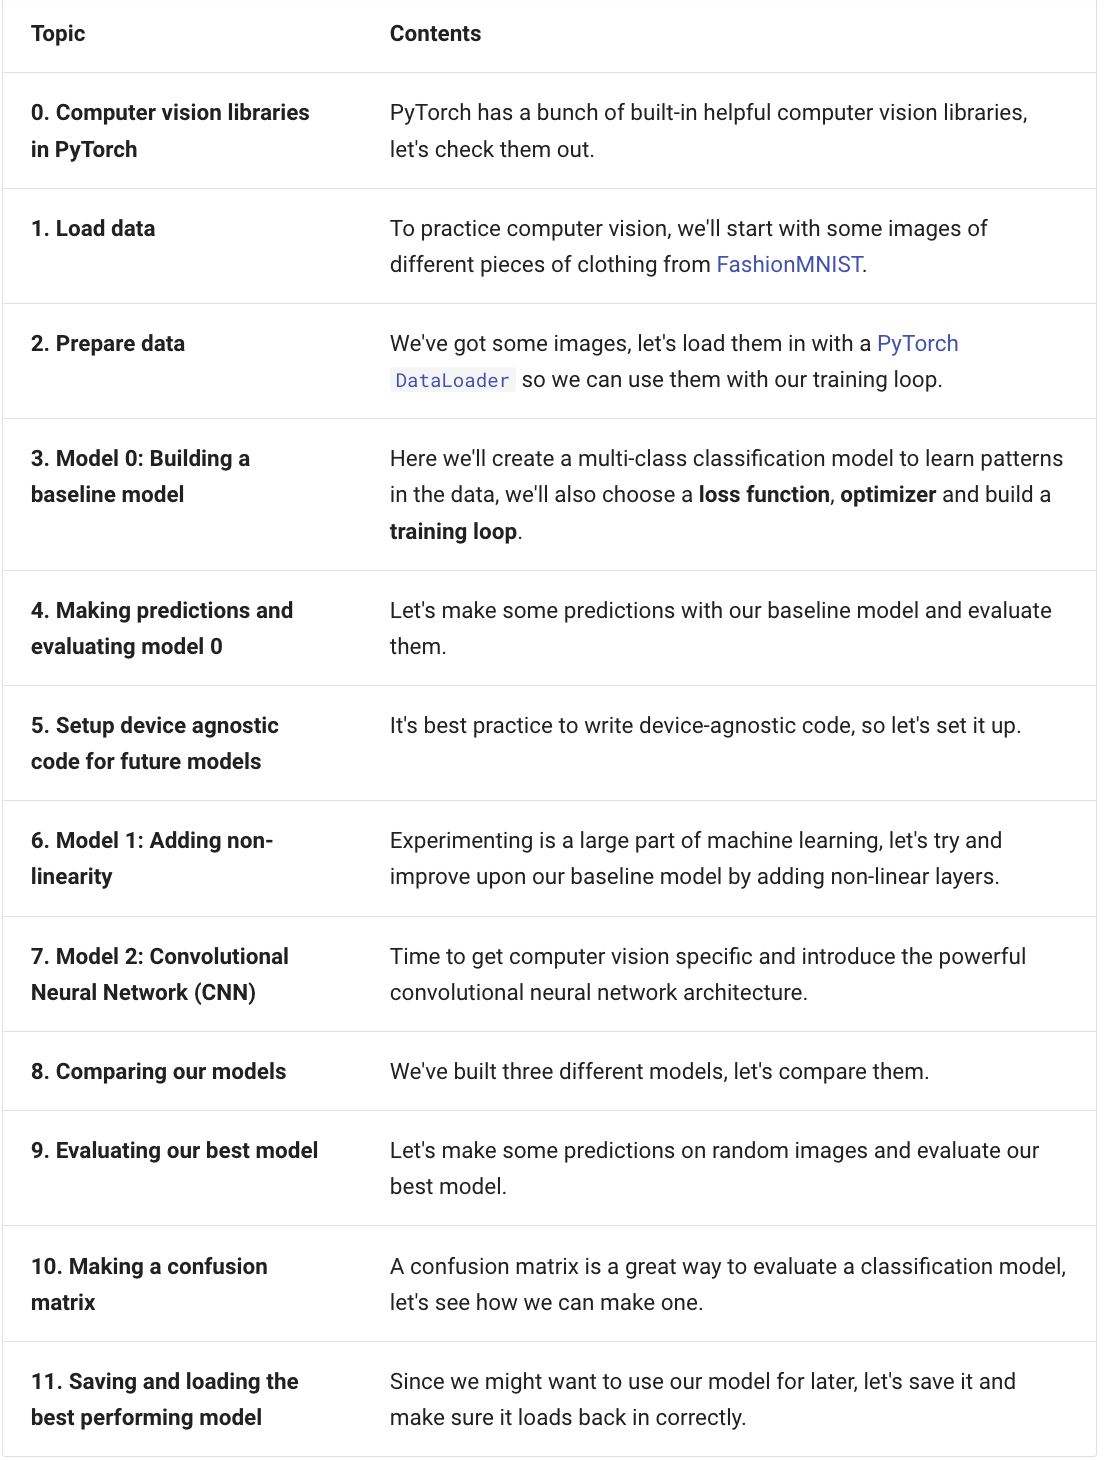

## 0. Computer vsision libraries in PyTorch
****

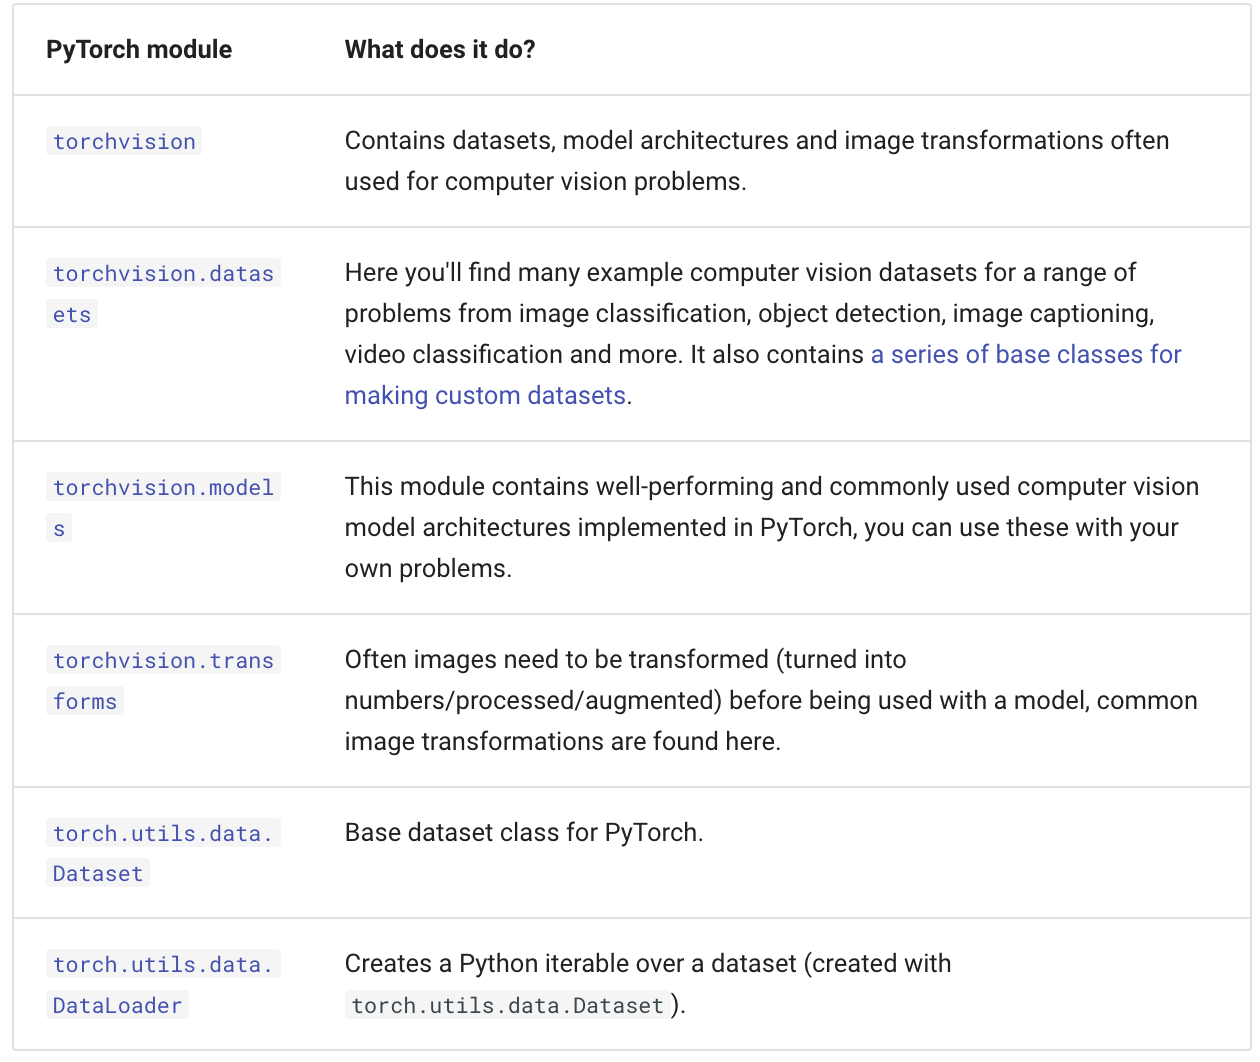

In [3]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#Import matplotlib
import matplotlib.pyplot as plt

print(f"PyTorch Version: {torch.__version__}")
print(f"\ntorchvision Version: {torchvision.__version__}")

PyTorch Version: 2.5.1+cu121

torchvision Version: 0.20.1+cu121


## 1. Getting a dataset
****
We are going to start with FashionMNIST.

To download it, we provide the following parameters:

* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.


In [4]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 5.54MB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 58.8MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.64MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

## 1.1 Input and output shapes of a computer vision model

In [7]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [8]:
label.shape # label is of int datatype. No shape

AttributeError: 'int' object has no attribute 'shape'

**shape of image is [1,28,28] -> [color_channels=1, height=28, width=28]**

Having `color_channels=1` means the image is grayscale

if `color_channels=3`, the iamge comes in pixel values of red, green and blue.

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

PyTorch generally accepts `NCHW` (channels first) as default for many operators. `N` is batch size.

In [9]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [10]:
# See classes meaning number of differnet types of objects.
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

This means our problem is **multi-class classification**

In [11]:
image.shape

torch.Size([1, 28, 28])

Image shape: torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

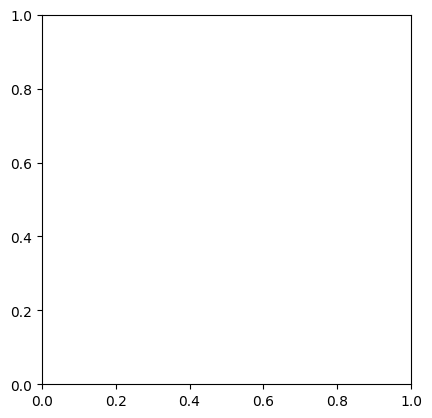

In [12]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image) # We need to remove the color-channel from it to plot it.

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

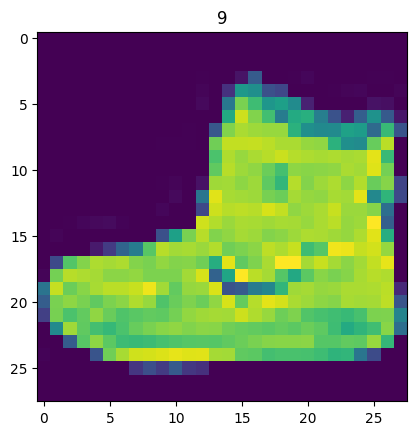

In [13]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)  # 9 is label.

Text(0.5, 1.0, 'Ankle boot')

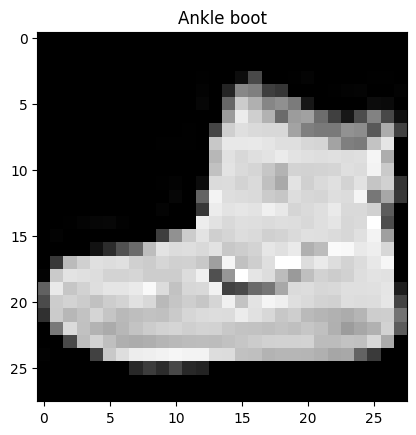

In [14]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])

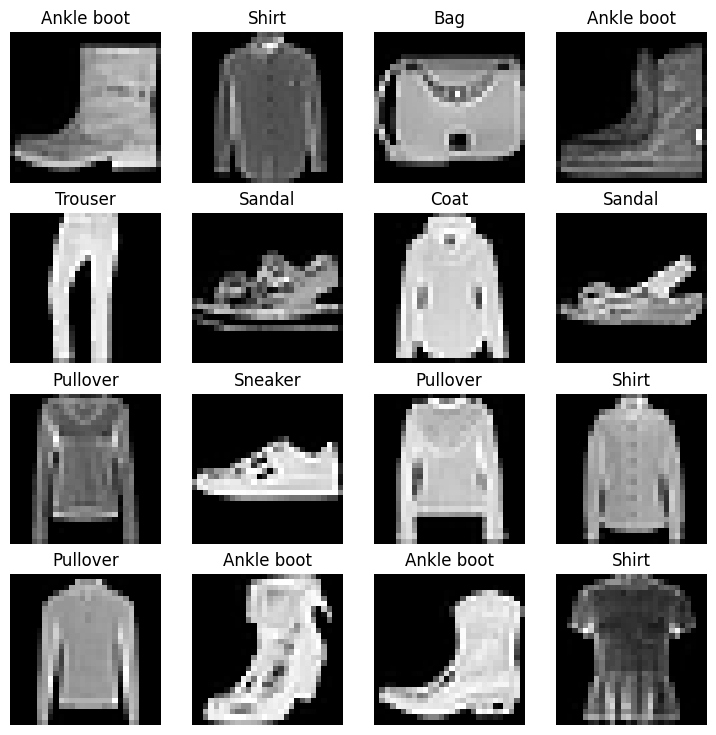

In [15]:
# plot more images

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

The for Loop
The loop iterates
4×4=16 times to plot 16 random images from the `train_data` dataset.

4.1. `random_idx = torch.randint(0, len(train_data), size=[1]).item()`
Let’s break this down:

* `torch.randint(0, len(train_data), size=[1])`:

  * Generates a random integer between `0` (inclusive) and `len(train_data)` (exclusive).
  * `size=[1]`: Specifies that we want a single random integer (stored in a 1-element tensor).
* `.item()`:

  * Extracts the single value from the 1-element tensor and returns it as a standard Python scalar (integer, in this case).
  * PyTorch tensors store values in a tensor object, even if there’s just one value. `.item()` converts it to a native Python data type.

**Why Use `.item()`**?
* To simplify the output from a PyTorch tensor (e.g., `tensor(42)`) to a Python scalar `(42)`.
* This makes it easier to use the value for indexing or display purposes.


In [16]:
# plot more images

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


<Figure size 900x900 with 0 Axes>

## 2. Prepare DataLoader
****
The next step is to prepare it with a `torch.utils.data.DataLoader` or `DataLoader` for short.

The `DataLoader` helps load data into a model.

It turns a large `Dataset` into a python iterable of smaller chunks.

These smaller chunks are called `batches` or `mini-batches` abd cab ve set by the `batch-size` parameter.

**why do this?**

Because it's more computationally efficient. In ideal world you could do the forward pass and backward pass across all of your data at once. But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches. It also gives your model more opportunity to improve.

With **mini-batches**, gradient descent is performed more often per epoch.

In [17]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              shuffle=True )

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False )

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b93320a01c0>, <torch.utils.data.dataloader.DataLoader object at 0x7b93320a1030>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [18]:
# Check out what's inside the training dataloader
train_features_batch, train_lebels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_lebels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

**Step 1**: `iter(train_dataloader)`
* `iter()` creates an iterator object from the `train_dataloader`.
* An iterator is an object in Python that allows you to iterate over items (e.g., batches in this case) one at a time.
* The `train_dataloader` object is iterable, so you can create an iterator from it using `iter()`.

**Step 2**: `next()`
* `next()` retrieves the next item (batch) from the iterator created by `iter()`.
* In the context of `train_dataloader`, `next()` will fetch the first batch of data when called for the first time.

**Why Use `next(iter())`?**

`next(iter(train_dataloader))` is a quick way to:

1. Grab a single batch of data for inspection (e.g., shapes or contents of images and labels).
2. Useful during debugging to verify data is being loaded and processed correctly.

In [19]:
train_features_batch

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [20]:
train_lebels_batch, train_lebels_batch.numel()

(tensor([5, 1, 8, 1, 5, 2, 6, 7, 3, 5, 9, 5, 7, 5, 0, 4, 4, 4, 4, 6, 1, 8, 0, 1,
         9, 7, 8, 8, 3, 3, 7, 2]),
 32)

In [21]:
len(train_features_batch)

32

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


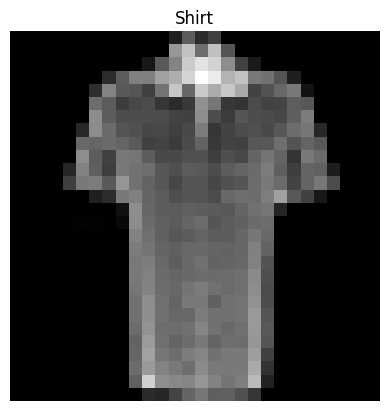

In [22]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_lebels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [23]:
random_idx

6

## 3. Model 0: Build a baseline model
****
Time to build a **baseline model** by subclassing `nn.Module`.

A **baseline model** is one of the simplest model you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated model.

Our baseline will consists of two `nn.Linear()` layers.

We will add `nn.Flatten()` layer. It compresses the dimensions of a tensor into a single vector.

In [24]:
# Create a flatten layer
flatten_mdoel = nn.Flatten() # all nn modules functions as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_mdoel(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, wwidth]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, wwidth]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


**Why do this?**

Because  we've now turned our pixel data from height and width dimensions into one long **feature vector**

In [25]:
from torch import nn
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networks like their inputs in vector form
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:

* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [26]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [27]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModel(input_shape=784, # One for every pixel (28x28)
                            hidden_units=10, #how many units in the hidden layer
                            output_shape=len(class_names) # one for every class
                            )
model_0.to(device)


FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 3.1 Setup loss, optimizer and evaluation metrics

In [28]:
import requests
from pathlib import Path

# Download helper function
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

In [29]:
from helper_function import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 3.2 Creating a function to time our experiments
****

In [30]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## 3.3 Creating a training loop and training a model on batches of data
****
Our batches are contained within our `DataLoader`, `train_dataloader` and `test_dataloader` for the training and test data of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated **per batch** rather than across the whole dataset.

This means we have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

Let's step through it:

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. print out what's happening

In [31]:
len(train_dataloader)

1875

In [35]:
import torch

In [32]:
# Import tqdm for progess bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Get the dveice
device = "cuda" if torch.cuda.is_available else "cpu"

# Move model to the selected device
model_0.to(device)

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  ### Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # Move data to selected device
    X, y = X.to(device), y.to(device)
    # 1. forward pass
    y_pred = model_0(X)  # --> gives logits

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backword
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader (avg loss per batch per epoch)
  train_loss /= len(train_dataloader)

  ### Testing
  # Setup varibales for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      # Move data to selected device
      X, y = X.to(device), y.to(device)
      # 1. Forward pass
      test_pred = model_0(X)

      # 2. Calcualte loss (accumulatively)
      test_loss += loss_fn(test_pred,y) # accumulatively ad up the loss per epoch

      # 3. calculate accuracy (preds neet=d to be same as y_true)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Calculation on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)

    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)

  # Print what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_end_time_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_end_time_on_cpu,
                                            device = str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cuda:0: 30.610 seconds


## 4. Make predictions and get model 0 results

In [33]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

    loss , acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
      for X, y in data_loader:
        # Move data to the selected device
        X , y = X.to(device), y.to(device)
        # make predictions with the model
        y_pred = model(X)

        # Accumulate the loss and accuracy values per batch
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y,
                            y_pred = y_pred.argmax(dim=1))

      # Scale loss and acc to find the avg loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# calculate model0 results on test dataset

model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results



{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 6. Model 1: Building a better model with non-linearity

In [34]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [35]:
class FashionMNISTModel1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int) -> None:
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [36]:
torch.manual_seed(42)

model_1 = FashionMNISTModel1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

next(model_1.parameters()).device


device(type='cuda', index=0)

## 6.1 Setup loss, optimzer and evaluation metrics

In [37]:
import requests
from pathlib import Path

# Download helper function
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

In [38]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

## 6.2 Functionizing training and test loops

In [39]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss , train_acc = 0, 0
  model.to(device)

  for batch, (X,y) in enumerate(data_loader):
    # send data to GPU
    X, y = X.to(device), y.to(device)

    # 1. forward pass
    y_pred = model(X)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred = y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # calculate loss and accuracy per epoch and print out what's happening
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      # Send data to cpu
      X,y = X.to(device), y.to(device)

      # 1. forward pass
      test_pred = model(X)

      # 2. Calculate loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> pred labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [40]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(data_loader=test_dataloader,
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                              end=train_time_end_on_cpu,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 31.119 seconds


In [41]:
torch.manual_seed(42)

model_1_result = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_1_result

{'model_name': 'FashionMNISTModel1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [42]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))

    # scale loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_result = eval_model(model=model_1, data_loader=test_dataloader,
                            loss_fn = loss_fn, accuracy_fn=accuracy_fn,
                            device=device)
model_1_result

{'model_name': 'FashionMNISTModel1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [43]:
# Check basline results
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 7.1 Model 2: Building a Convolutiona Neural Network (CNN)
****
CNN's are known for their capabilities to find patterns in visual data.

The CNN model we're going to be using is known as TinyVGG from the `CNN Explainer` website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.


## What model should I use?
****
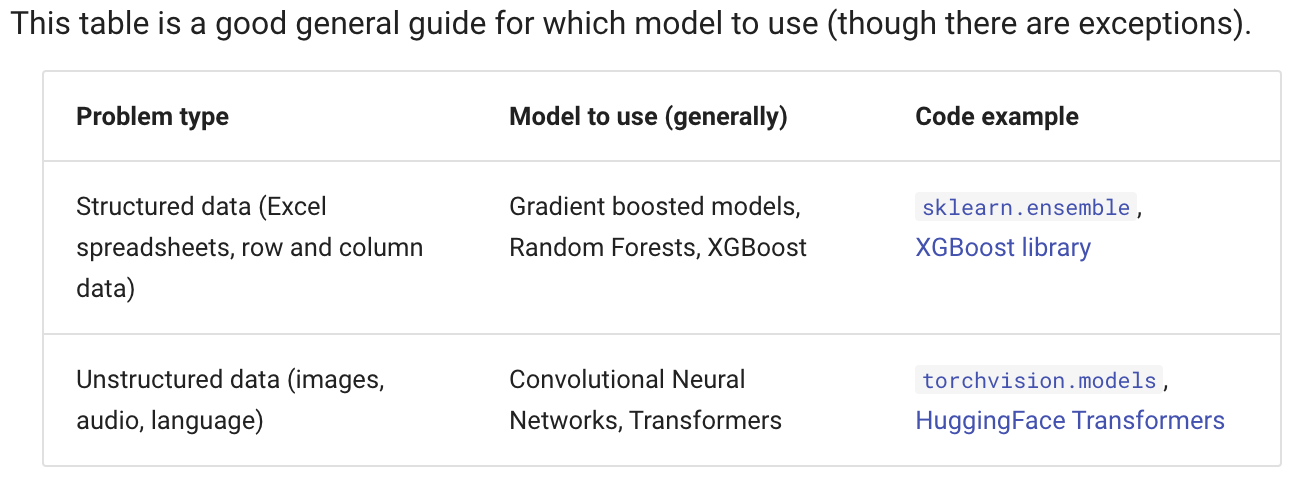




In [44]:
# Create a CNN
class FashionMNISTModel2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel size
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units,kernel_size= 3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # How can we calculate (7*7) for the model. See below
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    # print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModel2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

model_2


FashionMNISTModel2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#### Let's see how we got (7*7) value in classifier layer because that is very important to know otherwise it will give an error.

In [45]:
# Create a CNN
class FashionMNISTModel2_for_check(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel size
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units,kernel_size= 3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units, # I removed the (7*7) values because we can get them using some code.
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    print(f" Output shape of Conv block 1: {x.shape}")
    x = self.block_2(x)
    print(f" Output shape of Conv block 2: {x.shape}")
    x = self.classifier(x)
    print(f" Output shape of Classifier: {x.shape}")
    print(x.shape)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModel2_for_check(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

model_2


FashionMNISTModel2_for_check(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [46]:
# Let's create a random tensor that is same shape of our image

random_image_tensor = torch.randn(size=(1,28,28))
random_image_tensor.shape

torch.Size([1, 28, 28])

In [47]:
model_2(random_image_tensor.to(device))

 Output shape of Conv block 1: torch.Size([10, 14, 14])
 Output shape of Conv block 2: torch.Size([10, 7, 7])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 10x10)

****
As you can see in the error above, we can see the output shape of `Conv Block 1` and `Conv Block 2` but we are not able to see output shape of `classifier` and that's because `mat1 and mat2 shapes cannot be multiplied (10x49 and 10x10)`

**We know that output of `Conv block 2` is faltte in `Classifier block` meaning whatever output of block 2 is, we need to multiple them in our `Linear()` layer as an input and from that we get values (7*7)**

****

In [76]:
# Create a CNN
class FashionMNISTModel2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel size
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units,kernel_size= 3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # How can we calculate (7*7) for the model. See below
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    # print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModel2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

model_2


FashionMNISTModel2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 7.1 Steeping through `nn.Conv2d()`

In [77]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32,3,64,64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pizxel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pizxel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609

Let's create an example `nn.Conv2d()` with various paramters

In [78]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Pass the data through this layer
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [79]:
conv_layer(test_image).shape

torch.Size([10, 62, 62])

**What if changed the values of `conv_layer`**?

In [80]:
torch.manual_seed(42)

conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=(5,5),
                         stride=2,
                         padding=0)

conv_layer_2(test_image).shape

torch.Size([10, 30, 30])

Shape of our image changed as we changed values of our CNN layer. This is because how it calculate the output values with different hyperparamters.

One of the best resource to understand this to go through Andrew Ng course on CNN on coursera.

Understanding changes of shpaes through different layers in very essentail to understand any architeture of CNN.

In [81]:
conv_layer_2.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
                        [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
                        [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
                        [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
                        [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],
              
                       [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
                        [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
                        [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
                        [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
                        [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],
              
                       [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
                        [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
                        [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
                     

In [82]:
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


## 7.2 Steeping through `nn.MaxPool2d()`

In [83]:
# Print original image shape without and with unsqueezes dimensions
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezes dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv and max pool layer: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezes dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through conv and max pool layer: torch.Size([10, 31, 31])


Notice the change in the shapes of what's happening in and out of a `nn.MaxPool2d()` layer.

The `kernel_size` of the `nn.MaxPool2d()` layer will affect the size of the output shape.

In [84]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape:\n{random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the max value from random tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:
torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the max value from random tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


## 7.3 Setup a. loss function and optimizer for `model_2`

Since we are working with multi-class classification probelm we will use `nn.CrossEntropyLoss()`
and `torch.optim.SGD()` as the optimizer with `lr=0.1`

In [85]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## 7.4 Training and testing `model_2` using our training and testing functions

In [108]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_dataloader,
             model=model_2,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(data_loader=test_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59272 | Train accuracy: 78.46%
Test loss: 0.39708 | Test accuracy: 85.91%

Epoch: 1
---------
Train loss: 0.36442 | Train accuracy: 86.89%
Test loss: 0.35809 | Test accuracy: 87.05%

Epoch: 2
---------
Train loss: 0.32842 | Train accuracy: 88.05%
Test loss: 0.33034 | Test accuracy: 87.98%

Train time on cuda: 39.582 seconds


In [109]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

{'model_name': 'FashionMNISTModel2',
 'model_loss': 0.330343097448349,
 'model_acc': 87.97923322683707}

## 8. Compare model results and training time

In [110]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_result,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.476639,83.426518
1,FashionMNISTModel1,0.685001,75.019968
2,FashionMNISTModel2,0.330343,87.979233


**We can add the training time values too**

In [111]:
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel,0.476639,83.426518,30.610204
1,FashionMNISTModel1,0.685001,75.019968,31.118571
2,FashionMNISTModel2,0.330343,87.979233,39.582349


Text(0, 0.5, 'model')

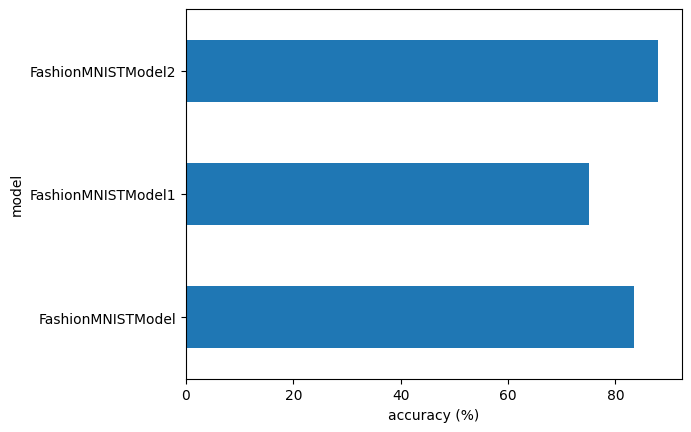

In [112]:
# Visualize our model results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

Text(0, 0.5, 'model')

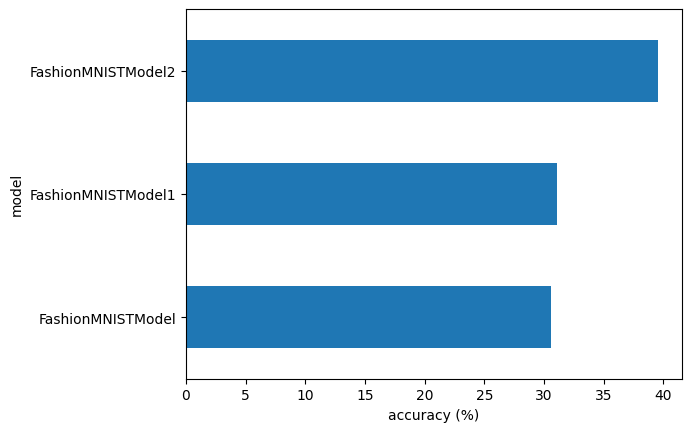

In [113]:
# Visualize our model results

compare_results.set_index("model_name")["training_time"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [114]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get predictions probabilities (logit -> prediction probabilities)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [115]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [116]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 9 (Ankle boot)


In [117]:
# Make prediction on test smaples with model 2
pred_probs = make_predictions(model= model_2,
                              data=test_samples)

# View first 2 predictions probabilities list
pred_probs[:2]

tensor([[5.6439e-05, 5.4420e-07, 3.4235e-05, 6.8840e-06, 7.9488e-06, 3.8335e-04,
         2.0061e-05, 8.9314e-01, 6.6816e-04, 1.0568e-01],
        [2.2522e-03, 5.8262e-05, 3.4695e-03, 1.8192e-03, 1.9398e-01, 7.2244e-05,
         7.9345e-01, 4.7783e-06, 4.8718e-03, 2.5920e-05]])

**And now we can go from prediction probabilities to prediction labels by taking the `torch,argmax()` of the output of the `torch.softmax()` activation function**

In [118]:
# Turn predicion probabilities into prediction labels by taking argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 6, 9, 6, 7, 2, 0, 5, 0])

In [119]:
# And our predictions in the same form as our test lables?
test_labels, pred_classes

([9, 6, 9, 6, 7, 2, 6, 5, 0], tensor([7, 6, 9, 6, 7, 2, 0, 5, 0]))

In [120]:
test_samples, len(test_samples)

([tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0

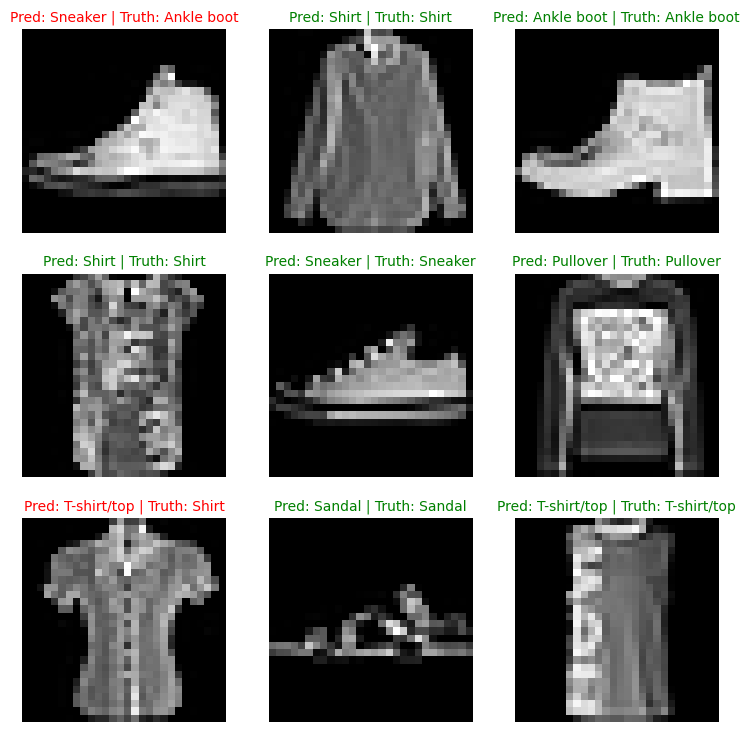

In [121]:
# Plot predictions
plt.figure(figsize=(9,9))
nrow = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrow, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title color accordingly
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
    plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)


## 10. Making a confusion matrix for further prediction evaluaion

In [122]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X ,y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction prob -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
  # Concatenate list of predictions into a tensor
  y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [123]:
# See if torch metrics exists, if not, install it
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.3


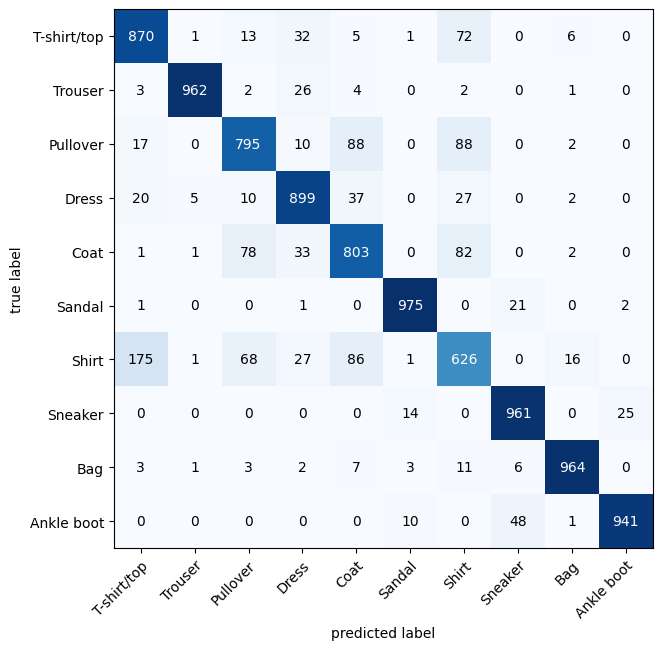

In [124]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion metrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
comfmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)

# Plot the confusion metrix
fig, ax = plot_confusion_matrix(
    conf_mat=comfmat_tensor.numpy(), #matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10,7)
)

#3 11. Save and load best performing model

In [1]:
from pathlib import Path

# Create models directory (if it doesn't already exist)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True) # if models directory already exists, don't error

# Create model save path
MODEL_NAME = "03_PyTorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict()
           f=MODEL_SAVE_PATH)

Saving model to: models/03_PyTorch_computer_vision_model_2.pth


NameError: name 'torch' is not defined

In [126]:
# Create a new instance of saved model

loaded_model_2 = FashionMNISTModel2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to device
loaded_model_2 = loaded_model_2.to(device)

<ipython-input-126-24fffa60836e>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


In [127]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModel2',
 'model_loss': 0.330343097448349,
 'model_acc': 87.97923322683707}

In [128]:
model_2_results

{'model_name': 'FashionMNISTModel2',
 'model_loss': 0.330343097448349,
 'model_acc': 87.97923322683707}

## Excercise

#### 1. Load the `torchvision.datasets.MNIST()` train and test datasets.

In [2]:
import torchvision
from torchvision import datasets
from torchvision import transforms

In [3]:
# Get the MINST train datasets
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform= transforms.ToTensor(), # do we want to transform the data as we download it?
                            target_transform=None)
# Get test data
test_data = datasets.MNIST(root=".",
                           train=False,
                           download= True,
                           transform = transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 52.4MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.86MB/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.0MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.88MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
img , label = train_data[0]
img.shape, label

(torch.Size([1, 28, 28]), 5)

In [7]:
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
img.shape
print(f"Image shape: {img.shape} -> [color_channel, height, width]")

Image shape: torch.Size([1, 28, 28]) -> [color_channel, height, width]


In [9]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

#### 2. Visualize at least 5 different samples of the MNIST training dataset.

Text(0.5, 1.0, '5')

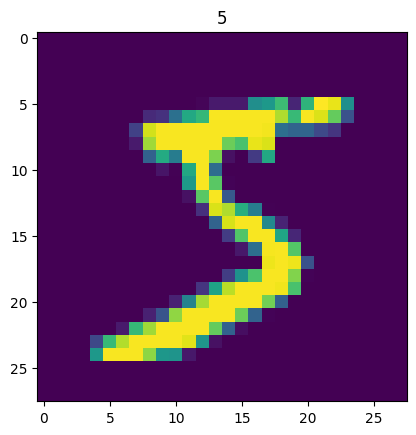

In [10]:
import matplotlib.pyplot as plt
img, label = train_data[0]
plt.imshow(img.squeeze())
plt.title(label)

Text(0.5, 1.0, '5 - five')

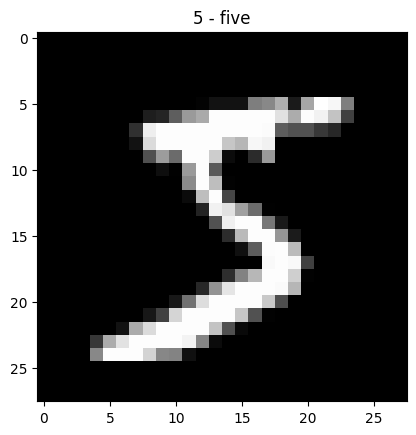

In [11]:
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])

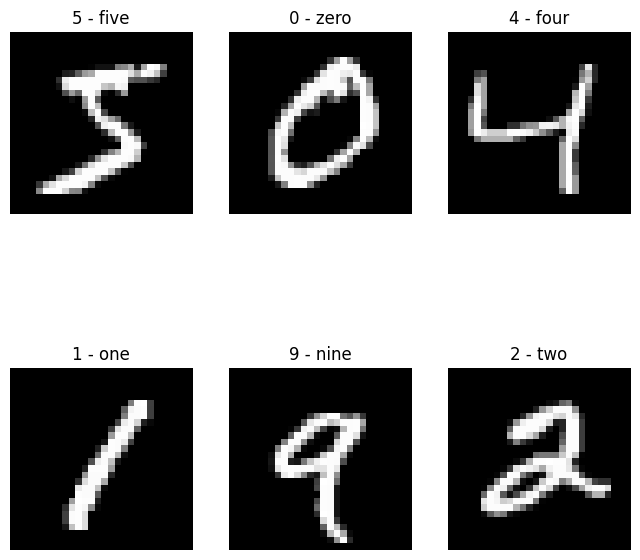

In [12]:
plt.figure(figsize=(8,8))
rows = 2
cols = 3

for i in range(6):
  plt.subplot(rows,cols,i+1)
  img, label = train_data[i]
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

#### 3. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size= BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size= BATCH_SIZE)

In [14]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78ef0d1e4460>,
 <torch.utils.data.dataloader.DataLoader at 0x78ef0986faf0>)

In [15]:
# Check what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [17]:
len(train_dataloader), len(test_dataloader) # These are the number of batches with 32 images inside each batch.

(1875, 313)

#### 4. Recreate `model_2` used in notebook 03 (the same model from the *CNN Explainer website*, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [18]:
import torch
from torch import nn

class MNIST_model_check(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.block_1(x)
    print(f"Output shape after block 1: {x.shape}")
    x = self.block_2(x)
    print(f"Output shape after block 2: {x.shape}")
    x = self.classifier(x)
    print(f"Output after classifier: {x.shape}")

    return x

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [20]:
model_3 = MNIST_model_check(input_shape=1,
                    hidden_units=10,
                    output_shape=len(class_names)).to(device)
model_3

MNIST_model_check(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
img.shape

torch.Size([1, 28, 28])

In [22]:
random_tensor = torch.randn(size=(1,28,28))
random_tensor.shape

torch.Size([1, 28, 28])

In [23]:
model_3(random_tensor.to(device))

Output shape after block 1: torch.Size([10, 14, 14])
Output shape after block 2: torch.Size([10, 7, 7])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 10x10)

In [24]:
import torch
from torch import nn

class MNIST_model(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.block_1(x)
    # print(f"Output shape after block 1: {x.shape}")
    x = self.block_2(x)
    # print(f"Output shape after block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output after classifier: {x.shape}")

    return x

In [25]:
model_3 = MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=len(class_names)).to(device)
model_3

MNIST_model(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [26]:
model_3.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[-0.0298,  0.2850, -0.2700],
                        [-0.1047,  0.0180, -0.0466],
                        [ 0.0399,  0.2826,  0.0286]]],
              
              
                      [[[ 0.2871, -0.2413, -0.1193],
                        [-0.2267,  0.0527, -0.3297],
                        [-0.0688,  0.1736,  0.2467]]],
              
              
                      [[[ 0.1647, -0.2217, -0.1564],
                        [ 0.0235,  0.0998,  0.3224],
                        [ 0.0547,  0.0920, -0.0194]]],
              
              
                      [[[ 0.2491, -0.2595, -0.2521],
                        [-0.1758,  0.2594,  0.1793],
                        [-0.2233,  0.1114,  0.0434]]],
              
              
                      [[[-0.2099, -0.0741, -0.2947],
                        [-0.1626,  0.0840, -0.1447],
                        [-0.1670, -0.1365, -0.0992]]],
              
              
           

In [27]:
random_tensor.shape # Dimensions are [color_channels, height, width]. Model needs 4 dimensions i.e. [Batch_Size, Color_channels, Height, Width]

torch.Size([1, 28, 28])

In [28]:
model_3(random_tensor.to(device)) # need to unsqueeze the dummy variable

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 490x10)

In [29]:
model_3(random_tensor.unsqueeze().to(device)) # Need to add dim=0 because we need to add batch size.

TypeError: unsqueeze() missing 1 required positional arguments: "dim"

In [30]:
# Dummy pass
model_3(random_tensor.unsqueeze(dim=0).to(device)) # model gave 10 logits because of nn.Linear layer at the end.

tensor([[ 0.1426, -0.0039,  0.0097, -0.0584,  0.0693,  0.0701,  0.0777,  0.0264,
         -0.0797, -0.0174]], grad_fn=<AddmmBackward0>)

#### 5. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [31]:
from tqdm.auto import tqdm

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_loss = 0
  model_3.to(device)
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model_3(X)

    # 2. Calcualte loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step optimizer
    optimizer.step()

  # Avg train loss
  train_loss /= len(train_dataloader)
  print(f"Train loss: {train_loss:.5f}")

  ### Testing loop
  test_loss_total = 0
  # Putt model in eval modoe and turn on inference mode
  model_3.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Put data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred = model_3(X_test)

      # 2. Calcualte loss
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss

    # Avg loss
    test_loss_total /= len(test_dataloader)
    print(f"Test loss: {test_loss_total:.5f}")





  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.31348
Test loss: 0.08323
Epoch: 1
--------
Train loss: 0.07578
Test loss: 0.05066
Epoch: 2
--------
Train loss: 0.05797
Test loss: 0.04509
Epoch: 3
--------
Train loss: 0.04941
Test loss: 0.05163
Epoch: 4
--------
Train loss: 0.04307
Test loss: 0.04072


#### 6. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [32]:
test_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [33]:
test_data[0][0].shape

torch.Size([1, 28, 28])

In [34]:
# Predicting Logits
model_pred_logits = model_3(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_logits, model_pred_logits.shape

(tensor([[ -4.0485,   0.2901,   2.9256,   5.8644,  -6.6276,  -1.8469, -14.9362,
           18.6319,  -0.9997,   2.9218]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

In [35]:
model_pred_logits.shape

torch.Size([1, 10])

In [36]:
# Logits -> Prediction prob
model_pred_prob = torch.softmax(model_pred_logits, dim=1) # dim=1 because we need to apply "softmax() to 10 logits. So shape of "model_pred_logits" is (1,10) and that's why "dim=1" which will apply to all 10 logits. 1 is batch size
model_pred_prob

tensor([[1.4126e-10, 1.0821e-08, 1.5095e-07, 2.8519e-06, 1.0714e-11, 1.2769e-09,
         2.6398e-15, 1.0000e+00, 2.9791e-09, 1.5038e-07]],
       grad_fn=<SoftmaxBackward0>)

In [37]:
model_pred_prob.shape

torch.Size([1, 10])

In [38]:
# Prediction probability -> Prediction labels
model_pred_label = torch.argmax(model_pred_prob, dim=1) # we need label from max of 10 probabilities from above step and that's why dim=1
model_pred_label

tensor([7])

In [68]:
import random
test_sample = []
test_labels = []

for sample, label in random.sample(list(test_data), k=6):
  # Get image and labels from the test data
  test_sample.append(sample)
  test_labels.append(label)

In [69]:
test_sample

[tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [70]:
test_sample[0].shape, len(test_sample)

(torch.Size([1, 28, 28]), 6)

In [71]:
# Make predictions

pred_probs = []
model_3.eval()
with torch.inference_mode():
  for sample in test_sample:
    # Prepare sample
    sample = torch.unsqueeze(sample, dim=0).to(device)

    # Forward pass (model output logits)
    pred_logits = model_3(sample)

    # Get prediction probability
    pred_prob = torch.softmax(pred_logits, dim=1)

    # Append probabilities for further calculations because matplotlib only works on CPU
    pred_probs.append(pred_prob.cpu())

# Stack the pred_probs to turn list into a tensor
pred_probs = torch.stack(pred_probs)

In [72]:
pred_classes = pred_probs.argmax(dim=2)
pred_classes, pred_classes.shape, pred_classes.ndim

(tensor([[1],
         [2],
         [3],
         [4],
         [0],
         [2]]),
 torch.Size([6, 1]),
 2)

In [73]:
test_labels, pred_classes

([1, 2, 3, 4, 0, 2],
 tensor([[1],
         [2],
         [3],
         [4],
         [0],
         [2]]))

In [74]:
pred_classes = pred_classes.squeeze()

In [75]:
test_labels, pred_classes

([1, 2, 3, 4, 0, 2], tensor([1, 2, 3, 4, 0, 2]))

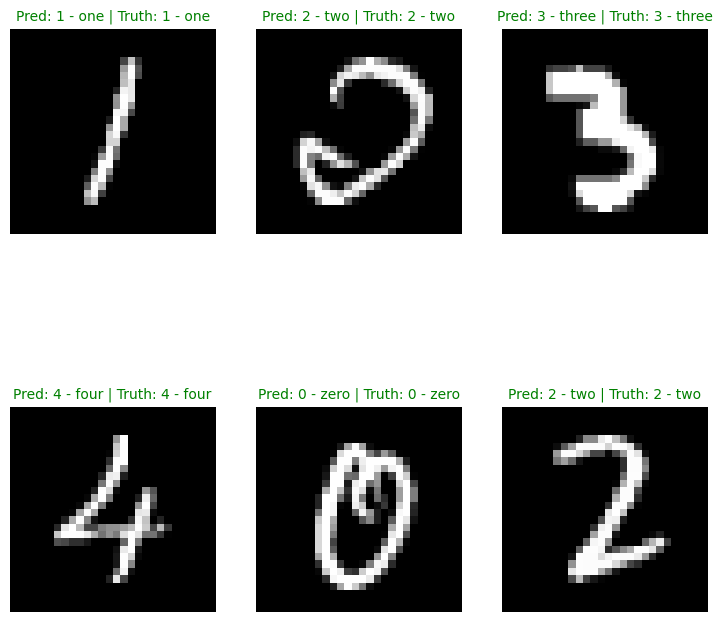

In [76]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 2
ncols = 3

for i, sample in enumerate(test_sample):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text format)
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

#### 7. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [77]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 13.8 MB/s eta 0:00:00
mlxtend version: 0.23.3


In [78]:
import mlxtend

In [79]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_3.eval()
y_preds = []

with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred_logits = model_3(X)

    # Logits -> Pred Prob -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1),dim=1)

    # Append the label to list
    y_preds.append(y_pred_labels)

# Stack them
y_preds = torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [81]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

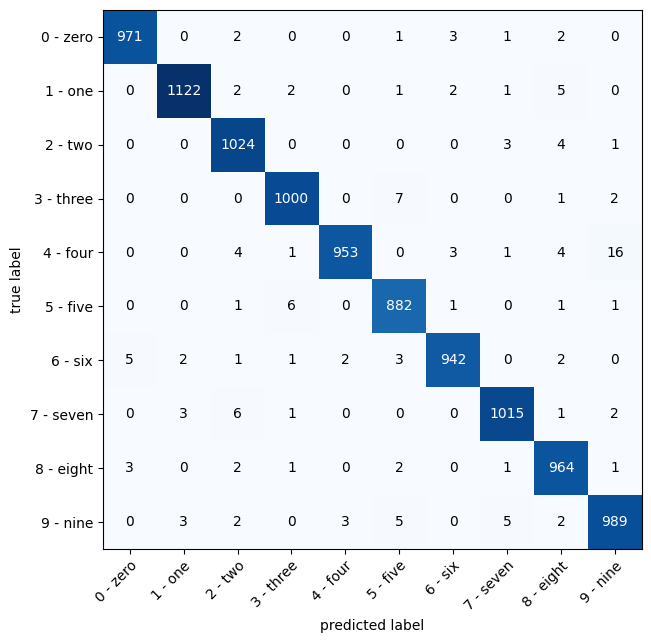

In [82]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion metrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds = y_preds,
                         target=test_data.targets)

# Plot the confusion metrix
fix, ac = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)